# **Importing Python Libraries**

In [1]:
#importing python libraries
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Importing train and test data**

In [2]:
#importing the train and test dataset
test=pd.read_csv('/kaggle/input/creditscoring-data/data_test.csv')
train=pd.read_csv('/kaggle/input/creditscoring-data/data_train.csv')

In [3]:
#checking the number of rows and columns in each dataset
print('shape of train data=',train.shape)
print('shape of test data=',test.shape)

shape of train data= (8707, 18)
shape of test data= (48, 18)


# **Exploratory Data Analysis**

In [4]:
train.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1


In [5]:
test.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1


In [6]:
#checking if there are any null values in the train data
train.isna().sum()

label                   0
Age                     0
Language                0
Sex                     0
Marital                 0
Has_Credit              0
Field                   0
Month_of_birth          0
Day_of_birth            0
Region                  0
Number_of_credits       0
Linked_cards            0
INPS_mln_sum            0
INPS_yes_no             0
Score_level             0
Score_class             0
Score_point             0
Changed_phone_number    0
dtype: int64

In [7]:
#checking for null values in test data
test.isna().sum()

label                   0
Age                     0
Language                0
Sex                     0
Marital                 0
Has_Credit              0
Field                   0
Month_of_birth          0
Day_of_birth            0
Region                  0
Number_of_credits       0
Linked_cards            0
INPS_mln_sum            0
INPS_yes_no             0
Score_level             0
Score_class             0
Score_point             0
Changed_phone_number    0
dtype: int64

In [8]:
#making an array for the columns
col=np.array(train.columns)

In [9]:
# in order to convert the '-' into numeric 0
score=train['Score_point']
score=pd.to_numeric(score,errors='coerce').fillna(0)

In [10]:
#converting categorical data to numerical data
le=LabelEncoder()
train['Score_point']=le.fit_transform(train['Score_point'])
le=LabelEncoder()
test['Score_point']=le.fit_transform(test['Score_point'])

In [11]:
#forming a correlation matrix
train[col].corr()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
label,1.000000,0.123461,0.014345,-0.051501,-0.039957,-0.013534,0.530324,0.001617,0.190716,-0.005306,-0.072519,-0.135919,0.054180,0.543770,0.047349,0.037060,0.059023,-0.820768
Age,0.123461,1.000000,0.040512,-0.227971,-0.283462,-0.014417,0.239177,-0.003929,0.030913,0.031262,0.009925,0.036998,0.007822,0.046266,0.130661,0.095699,0.123256,-0.117304
Language,0.014345,0.040512,1.000000,-0.032256,-0.007205,-0.048083,-0.002069,0.015089,0.003632,0.075075,0.046960,0.010812,-0.004001,0.034626,-0.034816,-0.030085,-0.029291,-0.010279
Sex,-0.051501,-0.227971,-0.032256,1.000000,-0.243037,-0.006288,-0.221835,-0.000964,-0.015630,-0.024944,0.008876,-0.034225,-0.016264,-0.026638,-0.012416,-0.004048,-0.019218,0.048469
Marital,-0.039957,-0.283462,-0.007205,-0.243037,1.000000,0.030411,0.016817,0.018724,-0.006846,-0.016744,-0.017860,-0.007904,-0.000283,-0.026435,-0.059917,-0.055429,-0.059988,0.038050
Has_Credit,-0.013534,-0.014417,-0.048083,-0.006288,0.030411,1.000000,-0.005047,0.020932,-0.006464,0.051867,0.134337,-0.025098,-0.021449,-0.155647,-0.057921,-0.057047,-0.055951,0.001375
Field,0.530324,0.239177,-0.002069,-0.221835,0.016817,-0.005047,1.000000,-0.009669,0.095333,-0.032443,-0.066323,-0.076464,0.039892,0.294541,0.027281,0.015345,0.035903,-0.441427
Month_of_birth,0.001617,-0.003929,0.015089,-0.000964,0.018724,0.020932,-0.009669,1.000000,-0.004538,-0.006085,0.004101,-0.000838,-0.008204,-0.005932,-0.010995,-0.013739,-0.014045,0.004093
Day_of_birth,0.190716,0.030913,0.003632,-0.015630,-0.006846,-0.006464,0.095333,-0.004538,1.000000,0.000326,-0.026389,-0.013717,0.013210,0.109631,0.010815,0.001109,0.016799,-0.154565
Region,-0.005306,0.031262,0.075075,-0.024944,-0.016744,0.051867,-0.032443,-0.006085,0.000326,1.000000,0.039482,-0.007468,0.016581,-0.003269,-0.089168,-0.093514,-0.090182,0.014111


<Axes: >

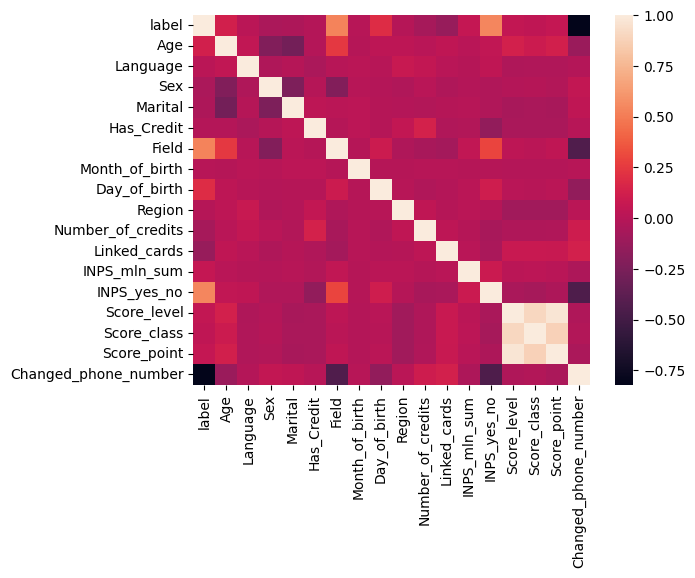

In [12]:
#heatmap
sns.heatmap(train[col].corr())

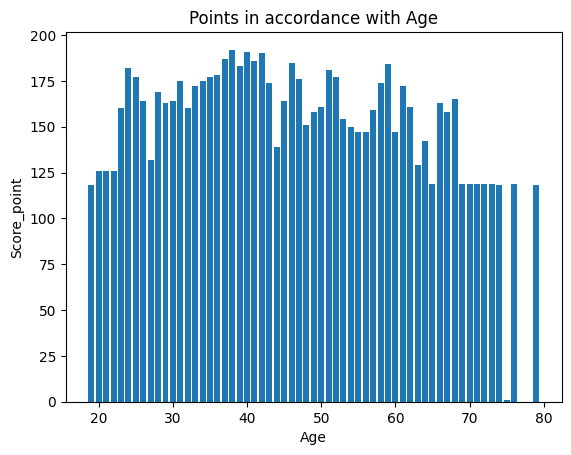

In [13]:
#to determine which age group might have higher credit points
a=train['Age']
b=train['Score_point']
plt.bar(a,b)
plt.xlabel('Age')
plt.ylabel('Score_point')
plt.title('Points in accordance with Age')
plt.show()

In [14]:
'''creating 2 lists, one which stores the score point values 
and the other which stores the number of people having that score'''
count = {}
for i in train['Score_point']:
    if i != 0:
        count[i] = 0

for i in train['Score_point']:
    if i != 0:
        count[i] += 1

cnt = []   # no_of_people with a particular score
labels = []  # score

for i in count:
    cnt.append(count[i])
    labels.append(i)

len(labels),len(cnt)
    

(192, 192)

In [15]:
train.head()

,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,0,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,0,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,0,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,0,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,0,1


In [16]:

max(labels),max(cnt)

(192, 6571)

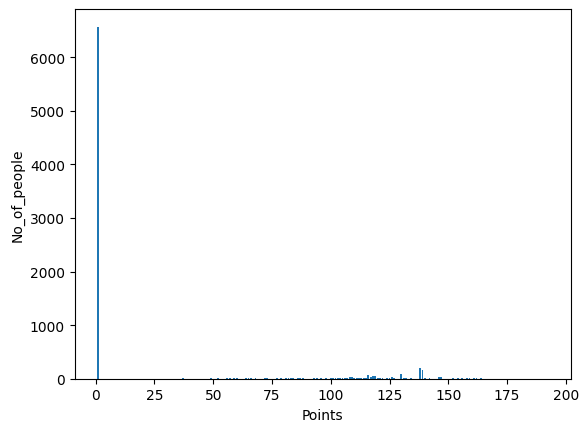

In [17]:
#bar chart between labels and their count
plt.bar(labels,cnt)
plt.xlabel('Points')
plt.ylabel('No_of_people')
plt.show()

This clearly shows that a very high number of people approximately 7000 have very low credit score(near to 0) and very low number of people ,even less that 500 have a high score reaching the maximum scor

# **Train and test data**

In [18]:
#splitting train data into x and y
x_train=train.drop(columns=['Score_point'])
y_train=train['Score_point']

In [19]:
#splitting test data into x and y
x_test=test.drop('Score_point',axis=1)
y_test=test['Score_point']

In [20]:
x_train.shape,y_train.shape

((8707, 17), (8707,))

In [21]:
x_test.shape,y_test.shape

((48, 17), (48,))

# **Model Training and Testing**

In [22]:
#Logistic Regression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print('accuracy of train data is = ',lr_model.score(x_train,y_train))

accuracy of train data is =  0.882508326633743


In [24]:
print('accuracy of test data is = ',lr_model.score(x_test,y_test))

accuracy of test data is =  0.8125


In [25]:
#KNN
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
print('accuracy of train data is = ',knn.score(x_train,y_train))

accuracy of train data is =  1.0


In [27]:
print('accuracy of test data is = ',knn.score(x_test,y_test))

accuracy of test data is =  0.7916666666666666


In [28]:
#Naive Bayes
nb_model=MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [29]:
print('accuracy of train data is = ',nb_model.score(x_train,y_train))

accuracy of train data is =  0.8598828528769955


In [30]:
print('accuracy of test data is = ',nb_model.score(x_test,y_test))

accuracy of test data is =  0.8333333333333334


In [31]:
# Decision Trees
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [32]:
print('accuracy of train data is = ',dt_model.score(x_train,y_train))

accuracy of train data is =  0.9117951073848628


In [33]:
print('accuracy of test data is = ',dt_model.score(x_test,y_test))

accuracy of test data is =  0.8125


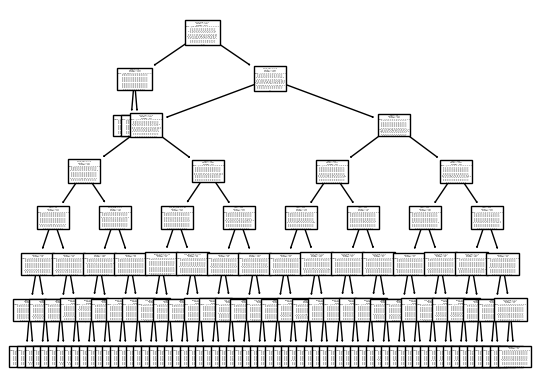

In [34]:
#plotting the tree
tree.plot_tree(dt_model,feature_names=x_train.columns);

In [35]:
#Random Forest
rf_model=RandomForestClassifier(max_depth=8)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [36]:
print('accuracy of train data is = ',rf_model.score(x_train,y_train))

accuracy of train data is =  0.9191455151027909


In [37]:
print('accuracy of train data is = ',rf_model.score(x_test,y_test))

accuracy of train data is =  0.8125


In [38]:
#Artificial Neural Networks
model=Sequential()

model.add(Dense(512,activation='relu',input_shape=(17,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(193,activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               9216      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 193)               12545     
                                                                 
Total params: 260033 (1015.75 KB)
Trainable params: 2600

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
y_train.shape

(8707,)

In [42]:
y_train=pd.to_numeric(y_train,errors='coerce').fillna(0)
y_train[:5]

0    0
1    0
2    0
3    0
4    0
Name: Score_point, dtype: int64

In [43]:
y_train=to_categorical(y_train)

In [44]:
y_train.shape,x_train.shape

((8707, 193), (8707, 17))

In [45]:
model.fit(x_train,y_train,batch_size=128,epochs=15,validation_split=0.2)

Epoch 1/15
55/55 [==============================] - 4s 10ms/step - loss: 1.2130 - accuracy: 0.7858 - val_loss: 1.6549 - val_accuracy: 0.6831
Epoch 2/15
55/55 [==============================] - 0s 6ms/step - loss: 0.7138 - accuracy: 0.8517 - val_loss: 1.4377 - val_accuracy: 0.7055
Epoch 3/15
55/55 [==============================] - 0s 6ms/step - loss: 0.6212 - accuracy: 0.8747 - val_loss: 1.4720 - val_accuracy: 0.6860
Epoch 4/15
55/55 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.8804 - val_loss: 1.3176 - val_accuracy: 0.7245
Epoch 5/15
55/55 [==============================] - 0s 6ms/step - loss: 0.5620 - accuracy: 0.8874 - val_loss: 1.4368 - val_accuracy: 0.7032
Epoch 6/15
55/55 [==============================] - 0s 6ms/step - loss: 0.5408 - accuracy: 0.8866 - val_loss: 1.2792 - val_accuracy: 0.7354
Epoch 7/15
55/55 [==============================] - 0s 6ms/step - loss: 0.5331 - accuracy: 0.8882 - val_loss: 1.3725 - val_accuracy: 0.6877
Epoch 8/15
55/55 [=

In [46]:
model.evaluate(x_train,y_train)

273/273 [==============================] - 1s 3ms/step - loss: 0.5827 - accuracy: 0.8671


[0.5826794505119324, 0.8671184182167053]

In [47]:
y_test=pd.to_numeric(y_test,errors='coerce').fillna(0)
y_test[:5]

0    0
1    0
2    0
3    0
4    9
Name: Score_point, dtype: int64

In [48]:
y_test=to_categorical(y_test)

In [49]:
y_test.shape,x_test.shape

((48, 10), (48, 17))